In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.colors import ListedColormap

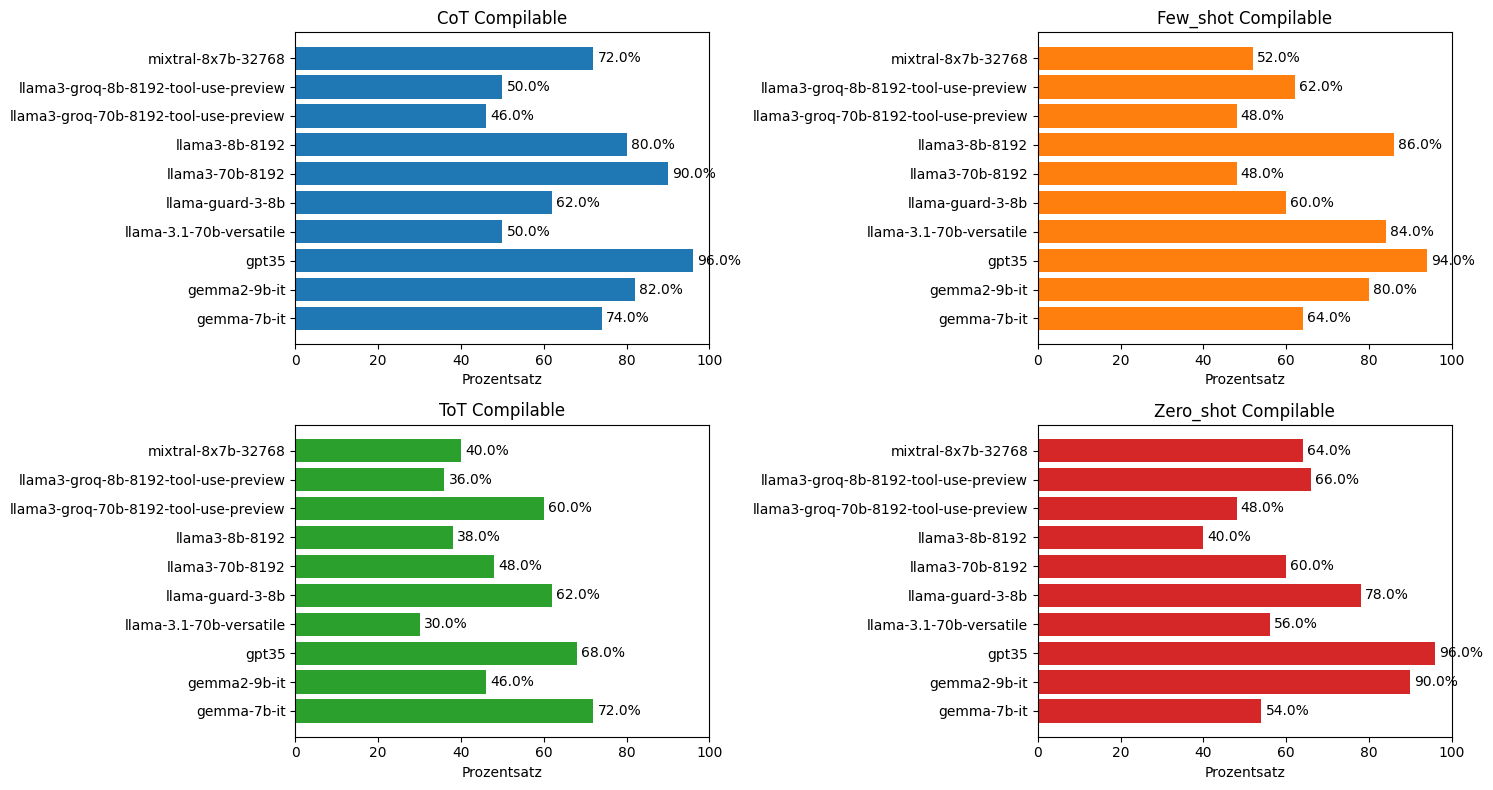

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lade die CSV-Datei
csv_file = 'eval_normals.csv'
data = pd.read_csv(csv_file)

# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Konvertiere Prozentwerte von Strings in Float-Werte
def convert_percentage_to_float(pct_str):
    if isinstance(pct_str, str) and '%' in pct_str:
        return float(pct_str.replace('%', ''))
    return float(pct_str)

# Wende die Konvertierung auf relevante Spalten an
df['Compilable'] = df['Compilable'].apply(convert_percentage_to_float)
df['Completion'] = df['Completion'].apply(convert_percentage_to_float)
df['BLEU-Score'] = df['BLEU-Score'].apply(convert_percentage_to_float)
df['Bert-Precision'] = df['Bert-Precision'].apply(convert_percentage_to_float)
df['Bert-Recall'] = df['Bert-Recall'].apply(convert_percentage_to_float)
df['Bert-F1'] = df['Bert-F1'].apply(convert_percentage_to_float)

# Definiere Balkenbreite und andere Parameter
bar_height = 0.8
models = df['LLMs'].unique()
prompt_techniques = df['prompt_technik'].unique()
num_techniques = len(prompt_techniques)

# Erstelle eine Farbkodierung für jede Technik
colors = plt.get_cmap('tab10').colors

# Metrik, die angezeigt werden soll
metric = 'Compilable'  # Beispiel-Metrik für die Demonstration

# Erstelle ein Raster von Subplots
fig, axes = plt.subplots(nrows=(num_techniques + 1) // 2, ncols=2, figsize=(15, 8))
axes = axes.flatten()

# Erstelle ein separates Diagramm für jede Prompt-Technik
for idx, technique in enumerate(prompt_techniques):
    subset = df[df['prompt_technik'] == technique]
    
    # Höhen für die Balken berechnen
    heights = [subset.loc[subset['LLMs'] == model, metric].values[0] if not subset.loc[subset['LLMs'] == model, metric].empty else 0 for model in models]
    
    # Positionen der Balken
    positions = np.arange(len(models))  # Positionen für die Modelle

    # Plotten der Balken
    bars = axes[idx].barh(positions, heights, bar_height, 
                          label=f'{technique}', 
                          color=colors[idx % len(colors)])

    # Werte in die Balken einfügen
    for bar in bars:
        axes[idx].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                       f'{bar.get_width()}%', 
                       va='center', 
                       ha='left', 
                       color='black')

    # Anpassen der y-Achsen-Beschriftungen
    axes[idx].set_yticks(positions)
    axes[idx].set_yticklabels(models)
    axes[idx].set_xlabel('Prozentsatz')
    axes[idx].set_title(f'{technique} {metric}')
    axes[idx].set_xlim(0, 100)  # Setze die x-Achse auf 0 bis 100 für Prozentsätze

# Entferne leere Subplots
for ax in axes[num_techniques:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()
